In [1]:
import pandas as pd

denominators_df = pd.read_csv('data/county_denominators.csv')
proprietary_df = pd.read_csv('data/county_proprietary_valid_2000_2018.csv')

In [3]:
denominators_df.head(10)

,state,county,cofips,race,sex,renters,variance
0,AL,AUTAUGA,1001,asian,female,32.786885,328.457836
1,AL,AUTAUGA,1001,asian,male,83.497268,2073.761231
2,AL,AUTAUGA,1001,black,female,1607.878606,26103.393639
3,AL,AUTAUGA,1001,black,male,1126.147074,12897.751771
4,AL,AUTAUGA,1001,hisp,female,78.823748,1182.507021
5,AL,AUTAUGA,1001,hisp,male,118.595547,2666.095325
6,AL,AUTAUGA,1001,other,female,72.566586,2184.736104
7,AL,AUTAUGA,1001,other,male,43.583535,791.873715
8,AL,AUTAUGA,1001,white,female,3481.352101,54538.104951
9,AL,AUTAUGA,1001,white,male,2718.371808,33472.864193


In [4]:
proprietary_df.head(10)

,cofips,county,state,year,type,filings,filing_rate,threatened,threatened_rate,judgements,judgement_rate
0,1001,Autauga County,Alabama,2001,observed,84,2.73,83,2.70,NaN,NaN
1,1001,Autauga County,Alabama,2002,observed,100,3.25,97,3.16,NaN,NaN
2,1001,Autauga County,Alabama,2003,observed,102,3.32,90,2.93,NaN,NaN
3,1001,Autauga County,Alabama,2008,observed,130,3.17,126,3.07,NaN,NaN
4,1001,Autauga County,Alabama,2009,observed,108,2.63,104,2.53,NaN,NaN
5,1001,Autauga County,Alabama,2010,observed,103,2.07,98,1.97,NaN,NaN
6,1001,Autauga County,Alabama,2011,observed,118,2.22,111,2.09,NaN,NaN
7,1001,Autauga County,Alabama,2012,observed,169,3.18,155,2.91,NaN,NaN
8,1001,Autauga County,Alabama,2013,observed,173,3.25,157,2.95,NaN,NaN
9,1001,Autauga County,Alabama,2014,observed,145,2.73,134,2.52,NaN,NaN


In [5]:
rows = len(proprietary_df)
print(rows)

21232


In [7]:
denominators_info = denominators_df.head(), denominators_df.columns.tolist()
denominators_info

(  state   county  cofips   race     sex      renters      variance
 0    AL  AUTAUGA    1001  asian  female    32.786885    328.457836
 1    AL  AUTAUGA    1001  asian    male    83.497268   2073.761231
 2    AL  AUTAUGA    1001  black  female  1607.878606  26103.393639
 3    AL  AUTAUGA    1001  black    male  1126.147074  12897.751771
 4    AL  AUTAUGA    1001   hisp  female    78.823748   1182.507021,
 ['state', 'county', 'cofips', 'race', 'sex', 'renters', 'variance'])

Cleaning proprietary_df

In [8]:
proprietary_df.tail()

,cofips,county,state,year,type,filings,filing_rate,threatened,threatened_rate,judgements,judgement_rate
21227,56045,Weston County,Wyoming,2006,observed,7,1.02,7,1.02,7.0,1.02
21228,56045,Weston County,Wyoming,2007,observed,5,0.73,5,0.73,5.0,0.73
21229,56045,Weston County,Wyoming,2008,observed,2,0.29,2,0.29,2.0,0.29
21230,56045,Weston County,Wyoming,2009,observed,1,0.15,1,0.15,1.0,0.15
21231,56045,Weston County,Wyoming,2018,observed,1,0.20,1,0.20,1.0,0.20


In [9]:
missing_values = proprietary_df.isnull().sum()
missing_values

cofips                0
county                0
state                 0
year                  0
type                  0
filings               0
filing_rate           0
threatened            0
threatened_rate       0
judgements         9496
judgement_rate     9496
dtype: int64

In [10]:
duplicates = proprietary_df.duplicated().sum()
duplicates

np.int64(0)

In [11]:
proprietary_df_cleaned = proprietary_df
proprietary_df_cleaned['judgements'].fillna(0, inplace=True)
proprietary_df_cleaned['judgement_rate'].fillna(0, inplace=True)

/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_28602/7841391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  proprietary_df_cleaned['judgements'].fillna(0, inplace=True)
/var/folders/40/fm8rs8fx1vd7lsm9bpc223040000gn/T/ipykernel_28602/7841391.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [12]:
check_missing_values = proprietary_df_cleaned.isnull().sum()
check_missing_values

cofips             0
county             0
state              0
year               0
type               0
filings            0
filing_rate        0
threatened         0
threatened_rate    0
judgements         0
judgement_rate     0
dtype: int64

In [13]:
data_types = proprietary_df_cleaned.dtypes
data_types

cofips               int64
county              object
state               object
year                 int64
type                object
filings              int64
filing_rate        float64
threatened           int64
threatened_rate    float64
judgements         float64
judgement_rate     float64
dtype: object

In [14]:
proprietary_df_cleaned.tail(10)

,cofips,county,state,year,type,filings,filing_rate,threatened,threatened_rate,judgements,judgement_rate
21222,56043,Washakie County,Wyoming,2017,observed,2,0.25,2,0.25,2.0,0.25
21223,56043,Washakie County,Wyoming,2018,observed,6,0.76,6,0.76,6.0,0.76
21224,56045,Weston County,Wyoming,2003,observed,3,0.52,3,0.52,3.0,0.52
21225,56045,Weston County,Wyoming,2004,observed,7,1.21,7,1.21,7.0,1.21
21226,56045,Weston County,Wyoming,2005,observed,4,0.58,4,0.58,4.0,0.58
21227,56045,Weston County,Wyoming,2006,observed,7,1.02,7,1.02,7.0,1.02
21228,56045,Weston County,Wyoming,2007,observed,5,0.73,5,0.73,5.0,0.73
21229,56045,Weston County,Wyoming,2008,observed,2,0.29,2,0.29,2.0,0.29
21230,56045,Weston County,Wyoming,2009,observed,1,0.15,1,0.15,1.0,0.15
21231,56045,Weston County,Wyoming,2018,observed,1,0.20,1,0.20,1.0,0.20


In [15]:
# This code snippet focuses on data exploration by examining unique values, missing data, duplicates, and data types within a dataset. 

unique_values = {col: proprietary_df_cleaned[col].unique() for col in proprietary_df_cleaned.columns if proprietary_df_cleaned[col].nunique() < 20}
missing_values, duplicates, data_types, unique_values

(cofips                0
 county                0
 state                 0
 year                  0
 type                  0
 filings               0
 filing_rate           0
 threatened            0
 threatened_rate       0
 judgements         9496
 judgement_rate     9496
 dtype: int64,
 np.int64(0),
 cofips               int64
 county              object
 state               object
 year                 int64
 type                object
 filings              int64
 filing_rate        float64
 threatened           int64
 threatened_rate    float64
 judgements         float64
 judgement_rate     float64
 dtype: object,
 {'year': array([2001, 2002, 2003, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
         2005, 2006, 2007, 2016, 2000, 2004, 2017, 2018]),
  'type': array(['observed'], dtype=object)})

In [16]:
proprietary_df_cleaned.to_csv('proprietary_df_cleaned.csv')

Original kmeans graph 
- data is not transformed yet

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [18]:
features = ['state', 'filings', 'filing_rate', 'threatened', 'threatened_rate', 'judgements', 'judgement_rate']

X = proprietary_df_cleaned[features]
X

,state,filings,filing_rate,threatened,threatened_rate,judgements,judgement_rate
0,Alabama,84,2.73,83,2.70,0.0,0.00
1,Alabama,100,3.25,97,3.16,0.0,0.00
2,Alabama,102,3.32,90,2.93,0.0,0.00
3,Alabama,130,3.17,126,3.07,0.0,0.00
4,Alabama,108,2.63,104,2.53,0.0,0.00
...,...,...,...,...,...,...,...
21227,Wyoming,7,1.02,7,1.02,7.0,1.02
21228,Wyoming,5,0.73,5,0.73,5.0,0.73
21229,Wyoming,2,0.29,2,0.29,2.0,0.29
21230,Wyoming,1,0.15,1,0.15,1.0,0.15


   cofips          county    state  year      type  filings  filing_rate  \
0    1001  Autauga County  Alabama  2001  observed       84         2.73   
1    1001  Autauga County  Alabama  2002  observed      100         3.25   
2    1001  Autauga County  Alabama  2003  observed      102         3.32   
3    1001  Autauga County  Alabama  2008  observed      130         3.17   
4    1001  Autauga County  Alabama  2009  observed      108         2.63   

   threatened  threatened_rate  judgements  judgement_rate  cluster  
0          83             2.70         0.0             0.0        0  
1          97             3.16         0.0             0.0        0  
2          90             2.93         0.0             0.0        0  
3         126             3.07         0.0             0.0        0  
4         104             2.53         0.0             0.0        0  


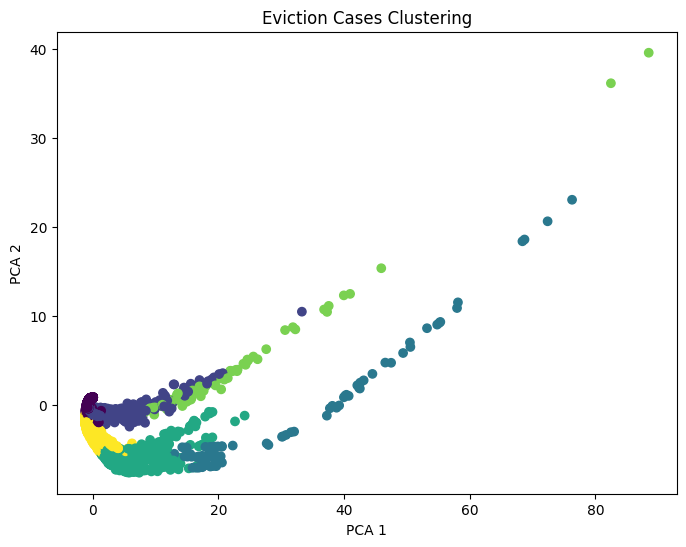

In [19]:
numerical_features = ['filings', 'filing_rate', 'threatened', 'threatened_rate', 'judgements', 'judgement_rate']
categorical_features = ['state']

# Create the preprocessing pipeline: scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the KMeans pipeline
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=6, random_state=42))  # you can experiment with the number of clusters
])

# Fit the pipeline to the data
kmeans_pipeline.fit(X)

# Get the cluster labels
proprietary_df_cleaned['cluster'] = kmeans_pipeline.predict(X)

# Show the results
print(proprietary_df_cleaned.head())

# Optionally, visualize the clusters (if you want to use 2D visualization, for example)
# Reduce the dimensionality with PCA to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(kmeans_pipeline.transform(X))

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=proprietary_df_cleaned['cluster'], cmap='viridis')
plt.title('Eviction Cases Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

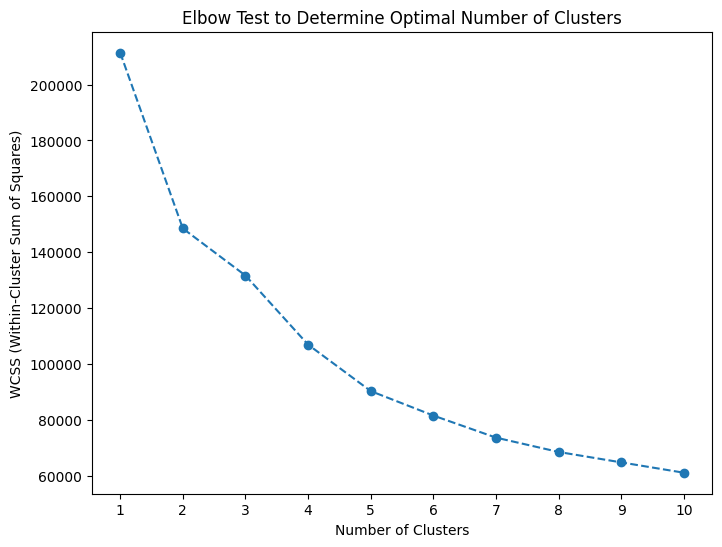

   cofips          county    state  year      type  filings  filing_rate  \
0    1001  Autauga County  Alabama  2001  observed       84         2.73   
1    1001  Autauga County  Alabama  2002  observed      100         3.25   
2    1001  Autauga County  Alabama  2003  observed      102         3.32   
3    1001  Autauga County  Alabama  2008  observed      130         3.17   
4    1001  Autauga County  Alabama  2009  observed      108         2.63   

   threatened  threatened_rate  judgements  judgement_rate  cluster  \
0          83             2.70         0.0             0.0        7   
1          97             3.16         0.0             0.0        7   
2          90             2.93         0.0             0.0        7   
3         126             3.07         0.0             0.0        7   
4         104             2.53         0.0             0.0        7   

   filings_per_threatened  log_filings  log_threatened_rate  
0                1.012048     4.442651             1.3

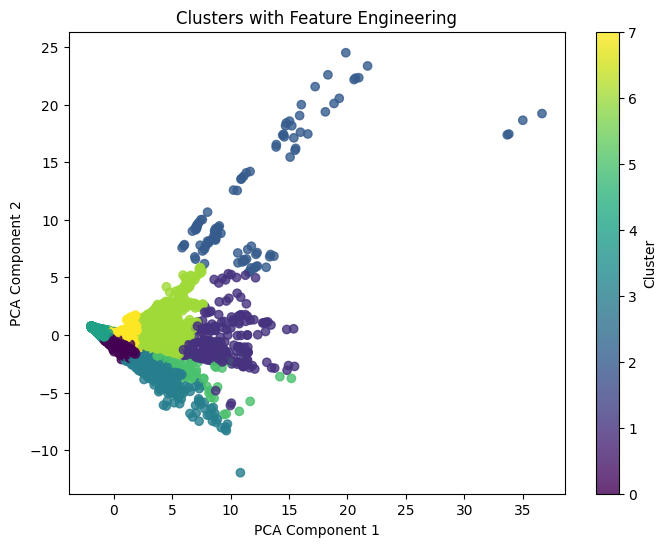

In [23]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# new features
proprietary_df_cleaned['filings_per_threatened'] = proprietary_df_cleaned['filings'] / proprietary_df_cleaned['threatened']
proprietary_df_cleaned['log_filings'] = np.log1p(proprietary_df_cleaned['filings'])  # Log transformation
proprietary_df_cleaned['log_threatened_rate'] = np.log1p(proprietary_df_cleaned['threatened_rate'])  # Log transformation

# numerical and categorical features
numerical_features = [
    'filings', 'filing_rate', 'threatened', 'threatened_rate', 
    'judgements', 'judgement_rate', 'filings_per_threatened', 
    'log_filings', 'log_threatened_rate'
]
categorical_features = ['state']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  
        ('cat', OneHotEncoder(), categorical_features)  
    ])

# Prepare the data for K-Means
X = proprietary_df_cleaned[numerical_features + categorical_features]

# Elbow Test to Determine Optimal Clusters
wcss = []  

for n_clusters in range(1, 11):  # Test cluster counts from 1 to 10
    kmeans_test = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('kmeans', KMeans(n_clusters=n_clusters, random_state=42))
    ])
    kmeans_test.fit(X)
    wcss.append(kmeans_test.named_steps['kmeans'].inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Test to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.show()

# optimal number of clusters based on the elbow test
optimal_clusters = 8  

kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=optimal_clusters, random_state=42))
])

kmeans_pipeline.fit(X)

# cluster labels to the original dataframe
proprietary_df_cleaned['cluster'] = kmeans_pipeline.predict(X)

print(proprietary_df_cleaned.head())

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(kmeans_pipeline.named_steps['preprocessor'].transform(X))

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=proprietary_df_cleaned['cluster'], cmap='viridis', alpha=0.8)
plt.colorbar(label='Cluster')
plt.title('Clusters with Feature Engineering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [26]:
proprietary_df_cleaned

,cofips,county,state,year,type,filings,filing_rate,threatened,threatened_rate,judgements,judgement_rate,cluster,filings_per_threatened,log_filings,log_threatened_rate
0,1001,Autauga County,Alabama,2001,observed,84,2.73,83,2.70,0.0,0.00,7,1.012048,4.442651,1.308333
1,1001,Autauga County,Alabama,2002,observed,100,3.25,97,3.16,0.0,0.00,7,1.030928,4.615121,1.425515
2,1001,Autauga County,Alabama,2003,observed,102,3.32,90,2.93,0.0,0.00,7,1.133333,4.634729,1.368639
3,1001,Autauga County,Alabama,2008,observed,130,3.17,126,3.07,0.0,0.00,7,1.031746,4.875197,1.403643
4,1001,Autauga County,Alabama,2009,observed,108,2.63,104,2.53,0.0,0.00,7,1.038462,4.691348,1.261298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21227,56045,Weston County,Wyoming,2006,observed,7,1.02,7,1.02,7.0,1.02,4,1.000000,2.079442,0.703098
21228,56045,Weston County,Wyoming,2007,observed,5,0.73,5,0.73,5.0,0.73,4,1.000000,1.791759,0.548121
21229,56045,Weston County,Wyoming,2008,observed,2,0.29,2,0.29,2.0,0.29,4,1.000000,1.098612,0.254642
21230,56045,Weston County,Wyoming,2009,observed,1,0.15,1,0.15,1.0,0.15,4,1.000000,0.693147,0.139762


In [25]:
# Analyze cluster composition
numeric_columns = proprietary_df_cleaned.select_dtypes(include=np.number).columns  # Select numeric columns only
cluster_summary = proprietary_df_cleaned.groupby('cluster')[numeric_columns].mean()  # Calculate mean for numeric columns
print("\nCluster Summary (Mean of Numeric Features):")
print(cluster_summary)

# Count of points in each cluster
cluster_counts = proprietary_df_cleaned['cluster'].value_counts().sort_index()
print("\nNumber of Points in Each Cluster:")
print(cluster_counts)

# Detailed information for each cluster
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster}:")
    cluster_data = proprietary_df_cleaned[proprietary_df_cleaned['cluster'] == cluster]
    print(cluster_data.head())  # Show the first few rows for this cluster
    print(f"Number of points: {len(cluster_data)}")
    print("Feature means:")
    print(cluster_data[numeric_columns].mean())  # Show mean values of numeric features



Cluster Summary (Mean of Numeric Features):
               cofips         year       filings  filing_rate    threatened  \
cluster                                                                       
0        32721.334947  2009.597809     71.907030     2.106335     68.335456   
1        34988.070039  2010.540856   7637.964981    29.872101   4732.085603   
2        30499.285714  2007.857143  54371.867347    18.448061  39026.785714   
3        31248.409867  2009.760911   1214.036053     8.386281   1026.652751   
4        28207.541807  2008.946527      8.745710     0.618047      8.579755   
5        24594.354839  2009.118280   9973.978495     8.664624   8630.387097   
6        31301.491713  2009.644567   3479.152855    10.389061   2813.260282   
7        31249.972878  2010.583944    331.342826     3.419384    302.954977   

         threatened_rate   judgements  judgement_rate  cluster  \
cluster                                                          
0               2.023594    54.2